In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.signal import find_peaks

In [2]:
sine = np.genfromtxt('sineTTL_RD800.csv')
TTL_timing = np.genfromtxt('photoncount_RD800.csv')

In [3]:
sine_absolute = []
temp = 0
for x in sine:
    temp+= x
    sine_absolute.append(temp)
    
    
absolute_timing_APD = []
temp=0
for y in TTL_timing:
    temp+=y
    absolute_timing_APD.append(temp)
    

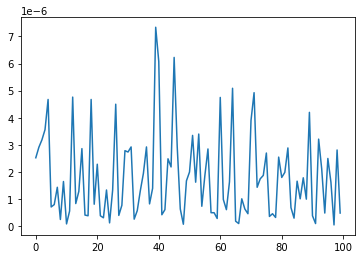

In [17]:
# plt.plot(absolute_timing_APD)
plt.plot(TTL_timing[:100])
# plt.plot(sine[:100])

# print(absolute_timing_APD)
# print(sine_absolute)

# print(len(TTL_timing))
# print(len(absolute_timing_APD))

In [52]:
histogram = []

i = 0 #sineTTL
j = 0 #APDTTL

while (i < len(sine_absolute)-1 and j < len(absolute_timing_APD) and absolute_timing_APD[j] < 1):
    if (absolute_timing_APD[j] < sine_absolute[i]):
        j+=1
    elif (absolute_timing_APD[j] >= sine_absolute[i] and absolute_timing_APD[j] < sine_absolute[i+1]):
        base = (sine_absolute[i+1] - sine_absolute[i])
        phase = ((absolute_timing_APD[j]-sine_absolute[i])/base)*360
        histogram.append(phase)
        j+=1
    elif (absolute_timing_APD[j] >= sine_absolute[i+1]):
        i+=1

Text(0, 0.5, 'counts')

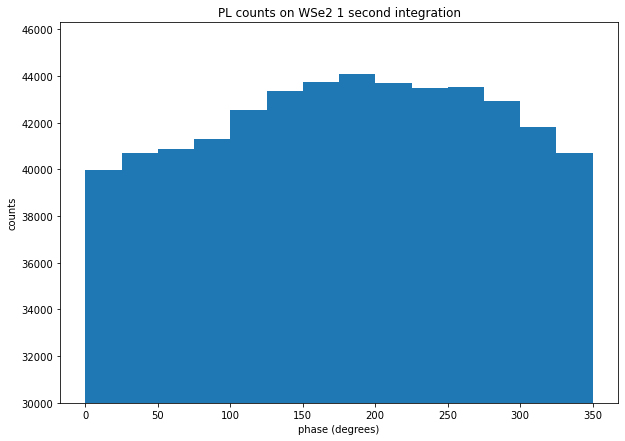

In [63]:
fig, ax = plt.subplots(figsize =(10, 7))
bin_array = np.arange(0,360,25)
ax.hist(histogram, bins = bin_array)
ax.set_ylim(bottom=30000)
ax.set_title('PL counts on WSe2 1 second integration')
ax.set_xlabel('phase (degrees)')
ax.set_ylabel('counts')